# (26) KNN

**Motivation**: Perform KNN classification analyses. Compare Pois versus Gaus. <br>

In [1]:
# HIDE CODE


import os, sys
from IPython.display import display

# tmp & extras dir
git_dir = os.path.join(os.environ['HOME'], 'Dropbox/git')
extras_dir = os.path.join(git_dir, 'jb-vae/_extras')
fig_base_dir = os.path.join(git_dir, 'jb-vae/figs')
tmp_dir = os.path.join(git_dir, 'jb-vae/tmp')

# GitHub
sys.path.insert(0, os.path.join(git_dir, '_PoissonVAE'))
from analysis.eval import sparse_score
from figures.fighelper import *
from vae.train_vae import *

# warnings, tqdm, & style
warnings.filterwarnings('ignore', category=DeprecationWarning)
from rich.jupyter import print
%matplotlib inline
set_style()

In [2]:
device_idx = 0
device = f'cuda:{device_idx}'

## Poisson

In [3]:
name = '/'.join([
    # 'gaussian_None_MNIST_z-10_k-32_<conv+b|conv+b>_wn',
    # 'mc_b200-ep600-lr(0.001)_beta(1:0x0.5)_gr(500)_(2024_04_26,07:57)',

    'poisson_uniform_c(-3)_rmax(1)_MNIST_z-10_k-32_<conv+b|conv+b>',
    'mc_b200-ep600-lr(0.001)_beta(1:0x0.5)_temp(0.05:lin-0.5)_lamb(0.01)_gr(500)_(2024_04_26,21:49)',

    # 'poisson_uniform_c(-3)_rmax(1)_MNIST_z-10_k-32_<conv+b|conv+b>_wn',
    # 'mc_b200-ep600-lr(0.001)_beta(1:0x0.5)_temp(0.05:lin-0.5)_gr(500)_(2024_04_25,20:15)',
])
tr, meta = load_quick(name, lite=False)
data, loss, etc = tr.validate()

print(meta)

{
    'checkpoint': 600,
    'global_step': 180000,
    'file': 'PoissonVAE+TrainerVAE-0600_(2024_04_26,23:36).pt',
    'path': 
'/home/hadi/Projects/PoissonVAE/models/poisson_uniform_c(-3)_rmax(1)_MNIST_z-10_k-32_<conv+b|conv+b>/mc_b200-ep600-
lr(0.001)_beta(1:0x0.5)_temp(0.05:lin-0.5)_lamb(0.01)_gr(500)_(2024_04_26,21:49)'
}

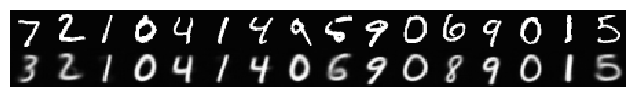

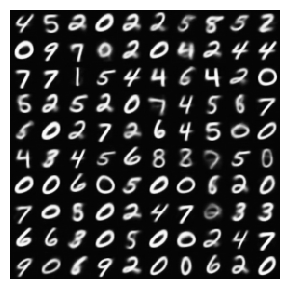

In [4]:
tr.show_recon(0.0), tr.show_samples(0.0);

In [6]:
df, df_summary = knn_analysis(
    x=etc['log_dr'],
    y=to_np(tr.dl_vld.dataset.tensors[1]),
    n_iter=100,
    verbose=True,
)
df.insert(0, 'type', 'poisson')
df_summary.insert(0, 'type', 'poisson')

train sample size: 5000, iter #0: 100%|█████████████████| 801/801 [01:39<00:00,  8.06it/s]


In [7]:
df_summary

,type,mean,std
size,,,
20,poisson,0.389612,0.056769
50,poisson,0.632544,0.053947
100,poisson,0.788676,0.033465
200,poisson,0.877330,0.021377
500,poisson,0.928626,0.008591
1000,poisson,0.943590,0.005146
2000,poisson,0.951416,0.002411
4000,poisson,0.957310,0.001173
5000,poisson,0.959800,NaN


,type,mean,std
size,,,
20,poisson,0.365838,0.059135
50,poisson,0.600692,0.049531
100,poisson,0.742088,0.035031
200,poisson,0.846658,0.022420
500,poisson,0.909358,0.010454
1000,poisson,0.936530,0.006064
2000,poisson,0.950006,0.002552
4000,poisson,0.955882,0.001130
5000,poisson,0.958000,NaN


In [6]:
df_summary  # was n_iter = 20

,type,mean,std
size,,,
200,poisson,0.83146,0.017451
1000,poisson,0.93561,0.006463
5000,poisson,0.95800,NaN


In [8]:
df_summary  # was n_iter = 100

,type,mean,std
size,,,
200,poisson,0.836764,0.021940
1000,poisson,0.936470,0.006785
5000,poisson,0.958000,NaN


In [10]:
df_summary  # was n_iter = 1000

,type,mean,std
size,,,
200,poisson,0.838258,0.022489
1000,poisson,0.935750,0.006625
5000,poisson,0.958000,NaN


## Gaussian

In [8]:
name = '/'.join([
    'gaussian_None_MNIST_z-10_k-32_<conv+b|conv+b>_wn',
    'mc_b200-ep600-lr(0.001)_beta(1:0x0.5)_gr(500)_(2024_04_26,07:57)',
])
tr, meta = load_quick(name, lite=False)
data, loss, etc = tr.validate()

print(meta)

{
    'checkpoint': 600,
    'global_step': 180000,
    'file': 'GaussianVAE+TrainerVAE-0600_(2024_04_26,10:19).pt',
    'path': 
'/home/hadi/Projects/PoissonVAE/models/gaussian_None_MNIST_z-10_k-32_<conv+b|conv+b>_wn/mc_b200-ep600-lr(0.001)_bet
a(1:0x0.5)_gr(500)_(2024_04_26,07:57)'
}

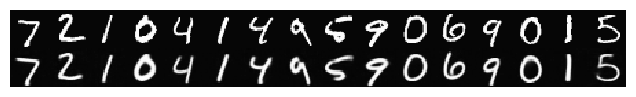

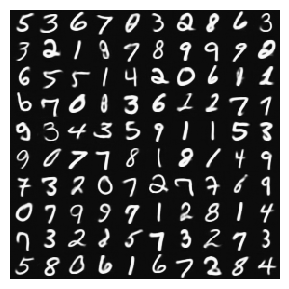

In [9]:
tr.show_recon(1.0), tr.show_samples(1.0);

In [10]:
# mu as representation
_df1, _df1_summary = knn_analysis(
    x=etc['mu'],
    y=to_np(tr.dl_vld.dataset.test_labels),
    n_iter=100,
    verbose=True,
)
_df1.insert(0, 'type', 'gaussian-mu')
_df1_summary.insert(0, 'type', 'gaussian-mu')

# log sigma as representation
_df2, _df2_summary = knn_analysis(
    x=np.log(etc['sigma']),
    y=to_np(tr.dl_vld.dataset.test_labels),
    n_iter=100,
    verbose=True,
)
_df2.insert(0, 'type', 'gaussian-logsigma')
_df2_summary.insert(0, 'type', 'gaussian-logsigma')

train sample size: 5000, iter #0: 100%|█████████████████| 801/801 [01:32<00:00,  8.66it/s]


## Combine, plot

In [11]:
df = pd.concat([df, _df1, _df2])
df_summary = pd.concat([df_summary, _df1_summary, _df2_summary])

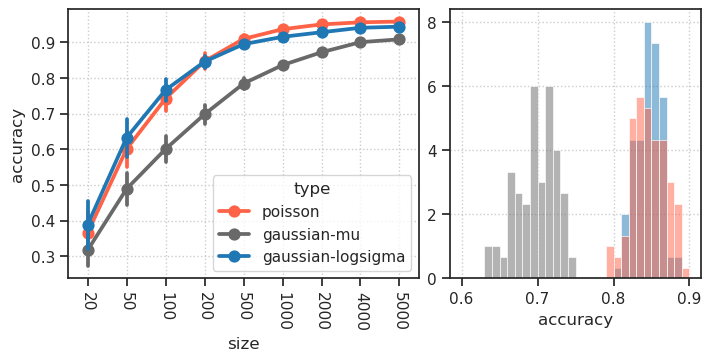

In [16]:
fig, axes = create_figure(1, 2, (7, 3.5), width_ratios=[1.4, 1], layout='constrained')

pal = {
    'poisson': 'tomato',
    'gaussian-mu': 'dimgrey',
    'gaussian-logsigma': 'C0',
}
sns.pointplot(
    data=df,
    x='size',
    y='accuracy',
    hue='type',
    palette=pal,
    errorbar='sd',
    ax=axes[0],
)
sns.histplot(
    data=df.loc[df['size'] == 200],
    x='accuracy',
    hue='type',
    palette=pal,
    stat='percent',
    bins=np.linspace(0.6, 0.9, 31),
    ax=axes[1],
)
axes[0].tick_params(axis='x', rotation=-90)
axes[1].set_ylabel('')
move_legend(axes[1])
add_grid(axes)
plt.show()

In [17]:
df_summary

,type,mean,std
size,,,
20,poisson,0.365838,0.059135
50,poisson,0.600692,0.049531
100,poisson,0.742088,0.035031
200,poisson,0.846658,0.022420
500,poisson,0.909358,0.010454
1000,poisson,0.936530,0.006064
2000,poisson,0.950006,0.002552
4000,poisson,0.955882,0.001130
5000,poisson,0.958000,NaN


In [20]:
def _show_pairwise(i, j, data: np.ndarray, func: Callable):
    fname = f"{func.__name__}(z)"
    df = pd.DataFrame({
        f'z_{i}': data[:, i],
        f'z_{j}': data[:, j],
        f'{fname}_{i}': func(data[:, i]),
        f'{fname}_{j}': func(data[:, j]),
        'lbl': tr.dl_vld.dataset.test_labels,
    })
    fig, axes = create_figure(1, 2, (10, 5.5), layout='constrained')
    sns.scatterplot(data=df, x=f'z_{i}', y=f'z_{j}', hue='lbl', palette='tab10', s=20, ax=axes[0])
    sns.scatterplot(data=df, x=f'{fname}_{i}', y=f'{fname}_{j}', hue='lbl', palette='tab10', s=5, legend=False, ax=axes[1])
    axes[1].axvline(0, color='k', ls='--', lw=1.0, zorder=0)
    axes[1].axhline(0, color='k', ls='--', lw=1.0, zorder=0)
    ax_square(axes)
    plt.show()

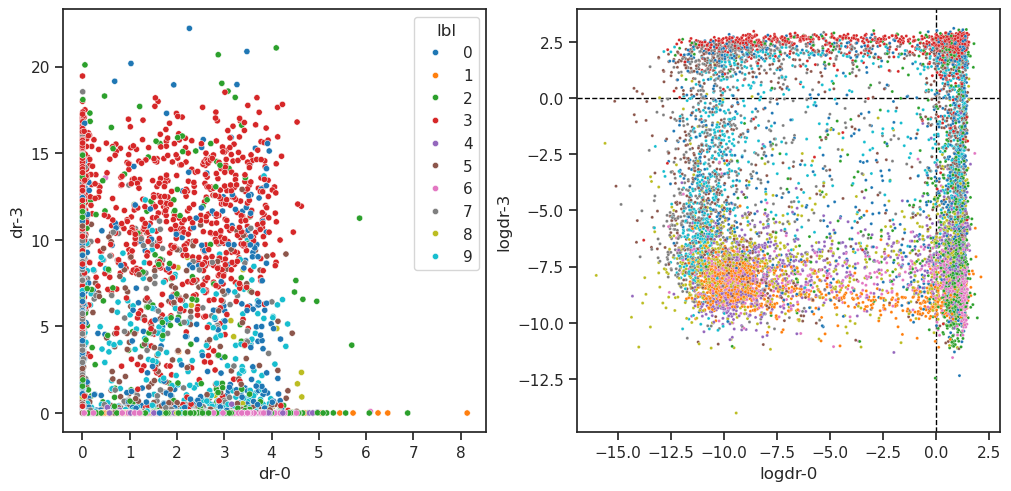

In [11]:
# _show_pairwise(3, 4)
_show_pairwise(0, 3)

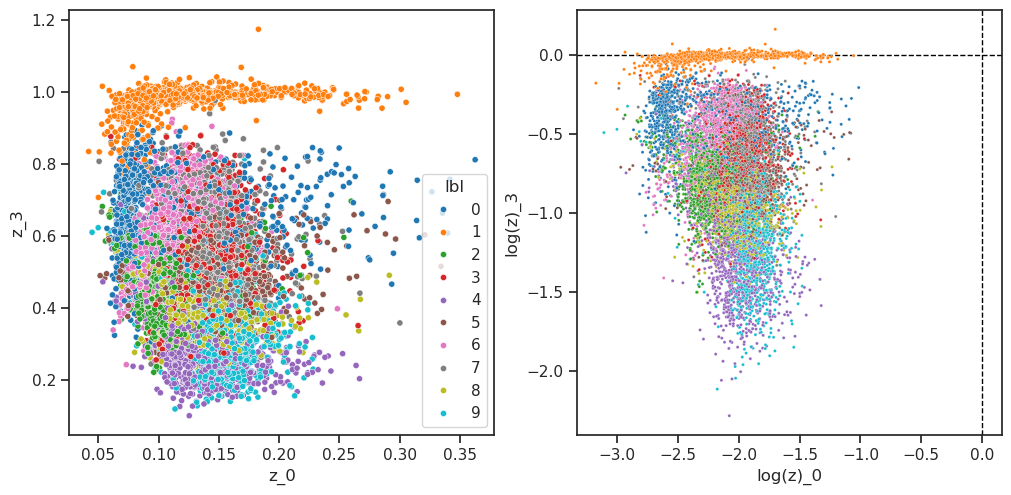

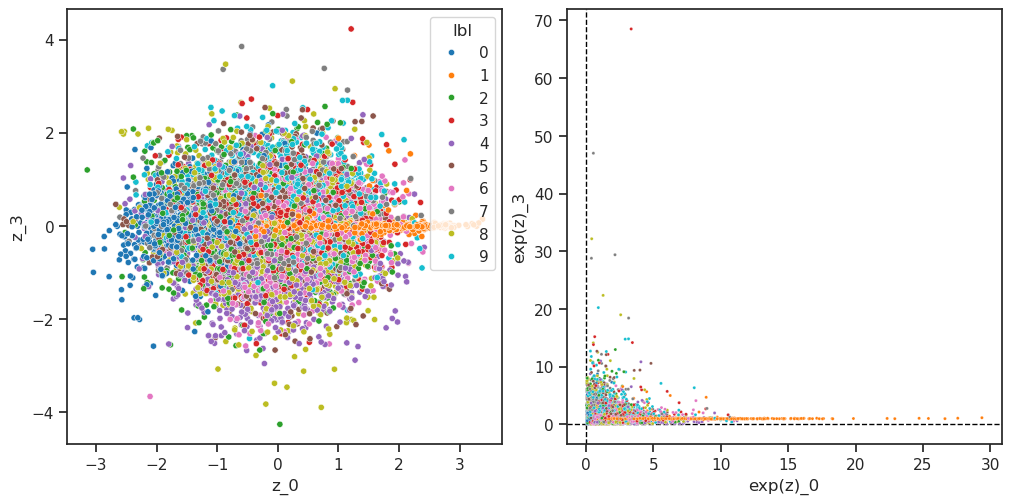

In [21]:
_show_pairwise(0, 3, etc['sigma'], np.log)
_show_pairwise(0, 3, etc['mu'], np.exp)